In [1]:
import pandas as pd

# Load the DataFrame from the pickle file
df = pd.read_pickle('preprocessed_data/signals_50OL_03Windowing.pkl')

# Display the first few rows of the DataFrame
print(df.head())

  label    RMS_E1    MAV_E1  VARIANCE_E1  SAMPLE_VARIANCE_E1    RMS_E2  \
0  Base  0.200014  0.199970     0.000018            0.000018  0.202461   
1  Base  0.193816  0.193720     0.000037            0.000038  0.154873   
2  Base  0.181736  0.181561     0.000063            0.000064  0.134383   
3  Base  0.166725  0.166455     0.000090            0.000092  0.120167   
4  Base  0.149564  0.149202     0.000108            0.000110  0.109139   

     MAV_E2  VARIANCE_E2  SAMPLE_VARIANCE_E2    RMS_E3  ...  VARIANCE_E6  \
0  0.197485     0.001990            0.002024  0.459723  ...     0.000026   
1  0.154214     0.000204            0.000207  0.342896  ...     0.000007   
2  0.134057     0.000087            0.000089  0.294403  ...     0.000004   
3  0.119960     0.000050            0.000050  0.261695  ...     0.000003   
4  0.108991     0.000032            0.000033  0.236985  ...     0.000002   

   SAMPLE_VARIANCE_E6    RMS_E7    MAV_E7  VARIANCE_E7  SAMPLE_VARIANCE_E7  \
0            0.00002

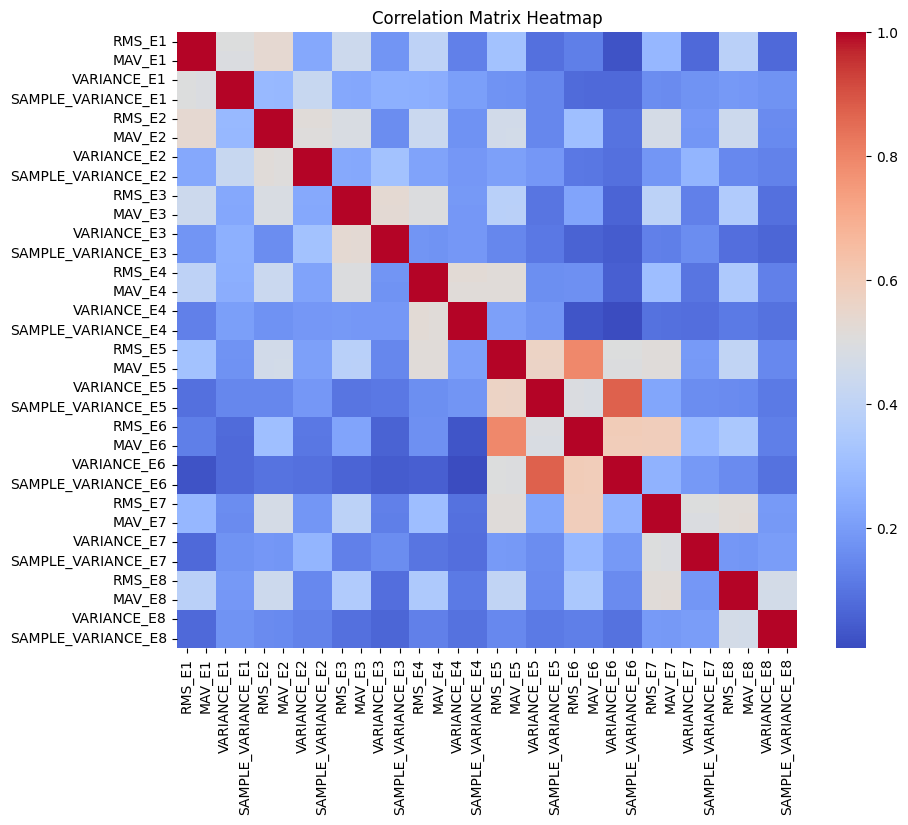

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the label column
features_df = df.drop(columns=['label'])

# Calculate the correlation matrix
correlation_matrix = features_df.corr()


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

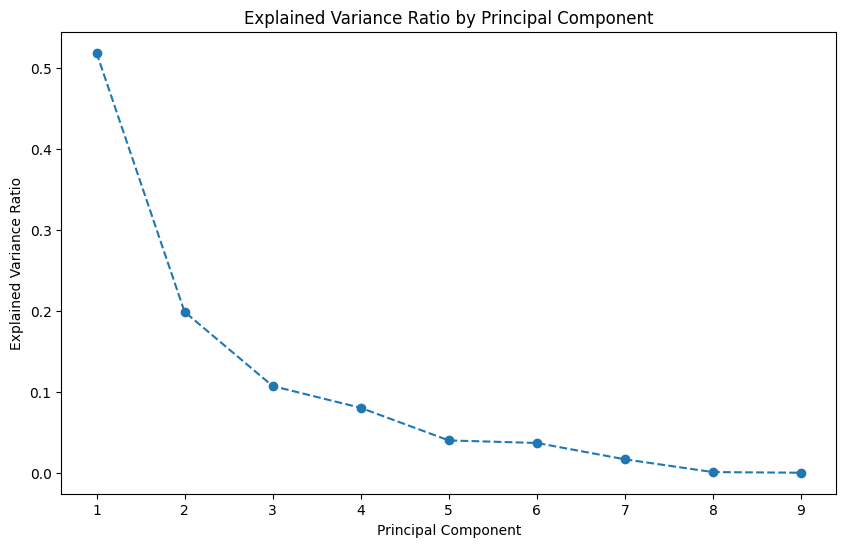

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=9)
pca.fit(features_df)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()



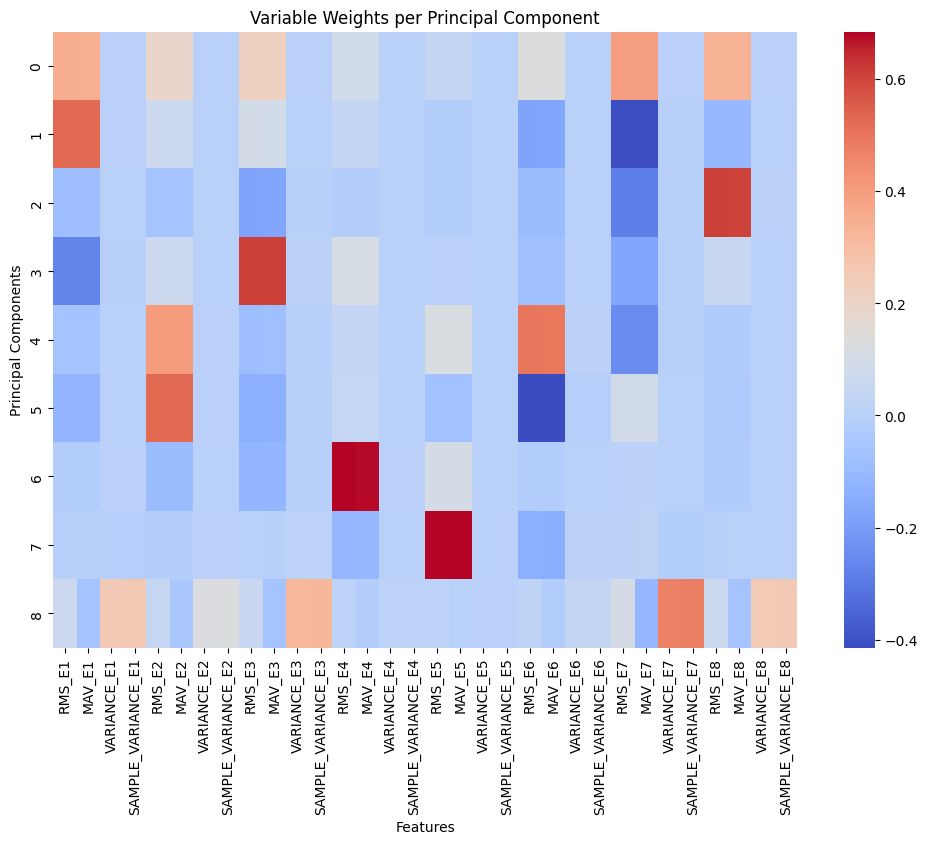

In [8]:
# Variable weights per component
components_df = pd.DataFrame(pca.components_, columns=features_df.columns)

# Plot heatmap of variable weights
plt.figure(figsize=(12, 8))
sns.heatmap(components_df, cmap='coolwarm', annot=False)
plt.title('Variable Weights per Principal Component')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()